# CIFAR-10 Dataset

Importing necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To ignore Warnings

import warnings             
warnings.filterwarnings('ignore')

In [2]:
# Function to unpickle data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [7]:
# Load data from batch 3

data_batch3 = unpickle('data_batch_3')

In [8]:
type(data_batch3)   #checking datatype of file

dict

In [9]:
len(data_batch3)   #checking length of data_batch5

4

In [10]:
data_batch3[b'data'].shape    #Check the shape of the image data

(10000, 3072)

In [11]:
data_batch3[b'data'][0]      

array([26, 17, 13, ..., 27, 26, 27], dtype=uint8)

In [12]:
image=data_batch3[b'data'][0]      #Extract and reshape the image data
image=image.reshape(3,32,32)
image

array([[[ 26,  17,  13, ...,  15,  24,  22],
        [ 20,  13,  13, ...,  19,  21,  29],
        [ 14,  13,  13, ...,  17,  25,  31],
        ...,
        [ 90,  34,  28, ...,  23,  16,   9],
        [ 79,  58,  32, ...,  14,  16,  10],
        [128,  58,  25, ...,  13,  12,  13]],

       [[ 23,  14,   9, ...,  14,  24,  21],
        [ 17,  10,   9, ...,  17,  20,  29],
        [ 11,  10,   9, ...,  16,  24,  31],
        ...,
        [109,  64,  54, ...,  20,  13,   6],
        [105,  96,  68, ...,  11,  13,   7],
        [157,  93,  60, ...,  10,   9,  10]],

       [[ 32,  25,  24, ...,  28,  37,  34],
        [ 26,  22,  24, ...,  35,  35,  39],
        [ 20,  21,  23, ...,  32,  38,  42],
        ...,
        [137,  95,  90, ...,  37,  30,  23],
        [141, 139, 110, ...,  28,  30,  24],
        [196, 149, 106, ...,  27,  26,  27]]], dtype=uint8)

In [13]:
# Reshape the entire dataset and transpose dimensions

data=data_batch3[b'data']
labels = data_batch3[b'labels']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)

#Display the Shape of the reshaped data

print(data.shape)    


(10000, 32, 32, 3)


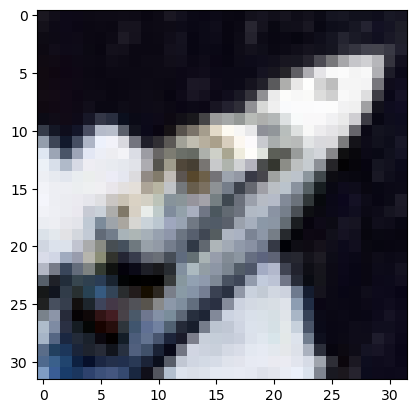

In [14]:
plt.imshow(data[0])  # Display the first image

In [15]:
batch_no=3

In [16]:
data_list=[]

In [17]:
# Create a list for data in the desired format for a DataFrame

for i in range(len(data)):
    d1=data[i].flatten()
    labels = data_batch3[b'labels']
    
    label= labels[i] #Extract the label (assuming it's a 1D array)
    
    data_list.append([label]+list(d1))
    

In [18]:
labels = data_batch3[b'labels']   # Creating a list of labels
#print(labels)

In [19]:
# Define column names for the DataFrame

column1=['label']+[f'Pixel_{i}' for i in range(len(data_list[0])-1)]

In [20]:
df=pd.DataFrame(data_list,columns=column1)   # Create a DataFrame

In [21]:
df.shape      #Shape of the DataFrame

(10000, 3073)

In [22]:
# Save the DataFrame to a CSV file

csv_filename = f'cifar10_batch_{batch_no}.csv'
df.to_csv("Batch3.csv", index=False)

In [23]:
df.head(5)   #Display the shape and the first 5 rows of the DataFrame

,label,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,8,26,23,32,17,14,25,13,9,24,...,28,13,10,27,12,9,26,13,10,27
1,5,94,86,58,101,91,61,95,85,54,...,-82,-94,-92,-74,-93,-90,-72,-121,-119,-101
2,0,-73,-70,-78,-98,-89,-104,-90,-84,-96,...,-6,-6,-5,-6,-6,-6,-6,-6,-5,-6
3,6,-1,-1,-1,-2,-2,-2,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,-74,-74,-85,-100,-101,-105,-100,-102,-100,...,68,-87,125,73,-88,121,67,-80,126,75


In [24]:
df.ndim    #Check dimensionality of data frame

2